In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Step 1: Secure Data Loading ---
filename = 'Superstore Dataset.csv' # <-- DOUBLE CHECK THIS FILENAME matches your file exactly

if os.path.exists(filename):
    try:
        # Try different encodings common in retail datasets
        df = pd.read_csv(filename, encoding='windows-1252')
        print(f" SUCCESS: {filename} loaded with windows-1252 encoding.")
    except:
        df = pd.read_csv(filename, encoding='utf-8')
        print(f" SUCCESS: {filename} loaded with utf-8 encoding.")
else:
    print(f"❌ ERROR: The file '{filename}' was not found.")
    print("Please ensure the CSV file is in the same folder as this Notebook.")
    print("Current Working Directory is:", os.getcwd())
    
# --- Cell 2: Data Quality Audit ---
# This will now only run if 'df' exists
if 'df' in locals():
    print("\n--- INITIAL DATA AUDIT ---")
    print(f"Total Rows: {len(df)}")
    print(f"Duplicate Rows: {df.duplicated().sum()}")
    print(f"Missing Values:\n{df.isnull().sum()[df.isnull().sum() > 0]}")
    display(df.head())

 SUCCESS: Superstore Dataset.csv loaded with utf-8 encoding.

--- INITIAL DATA AUDIT ---
Total Rows: 9994
Duplicate Rows: 1
Missing Values:
Series([], dtype: int64)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [15]:
# 1. Data Quality Audit
df.drop_duplicates(inplace=True)
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

# 2. Date Standardization
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# 3. Creating Mandatory Project Columns
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month_name()
df['Order Quarter'] = "Q" + df['Order Date'].dt.quarter.astype(str)
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

# Sorting Months for proper Time-Series visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['Order Month'] = pd.Categorical(df['Order Month'], categories=month_order, ordered=True)

print("✅ Step 2 Complete: Features engineered.")

✅ Step 2 Complete: Features engineered.


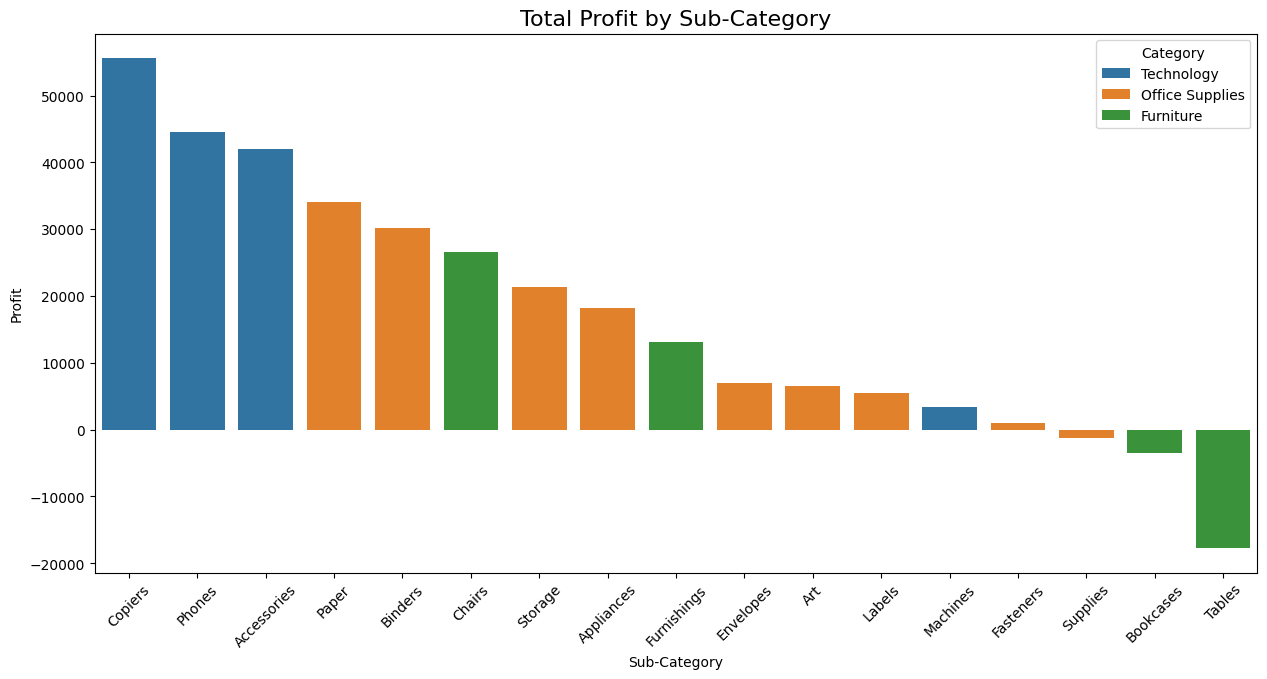

C:\Users\Bhumika\AppData\Local\Temp\ipykernel_14636\892096238.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trends = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()


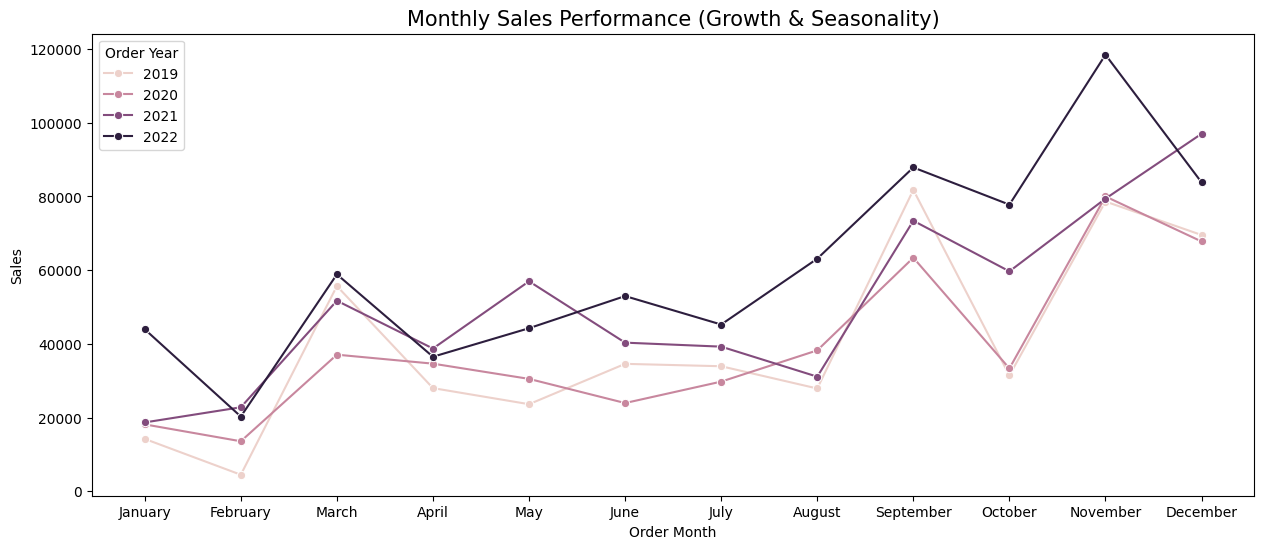

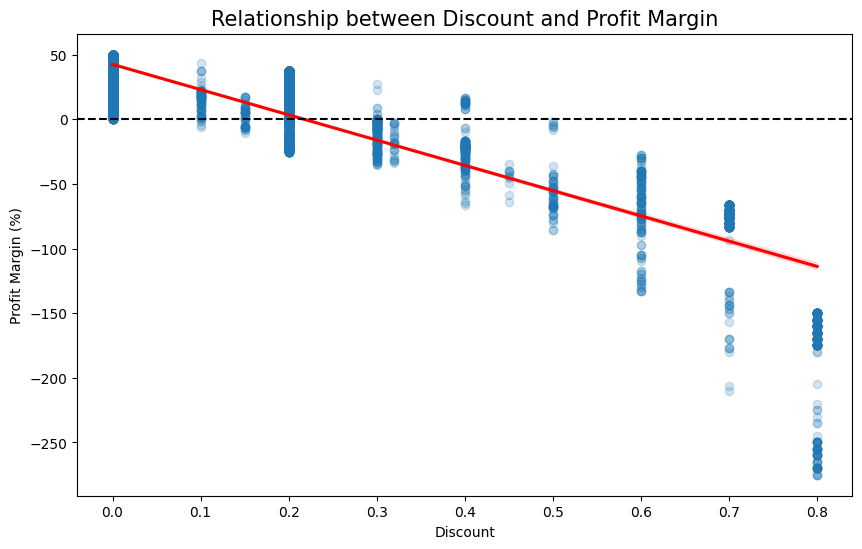

In [21]:
# Analysis for Categories and Segments
product_analysis = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Profit', ascending=False).reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(data=product_analysis, x='Sub-Category', y='Profit', hue='Category')
plt.title('Total Profit by Sub-Category', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# B. Seasonality Analysis (Questions 4 & 5)
seasonal_trends = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(data=seasonal_trends, x='Order Month', y='Sales', hue='Order Year', marker='o')
plt.title('Monthly Sales Performance (Growth & Seasonality)', fontsize=15)
plt.show()

# C. Discount Impact (Questions 8 & 9)
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount', y='Profit Margin (%)', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.axhline(0, color='black', linestyle='--')
plt.title('Relationship between Discount and Profit Margin', fontsize=15)
plt.show()

Top Problem States (High Sales, Negative Profit):
            State        Sales      Profit     Margin
41         Texas  170188.0458 -25729.3563 -15.118192
36  Pennsylvania  116511.9140 -15559.9603 -13.354823
8        Florida   89473.7080  -3399.3017  -3.799219
11      Illinois   80166.1010 -12607.8870 -15.727205
33          Ohio   77976.7640 -16959.3178 -21.749194


C:\Users\Bhumika\AppData\Local\Temp\ipykernel_14636\1960721641.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=problem_areas, x='Margin', y='State', palette='Reds_r')


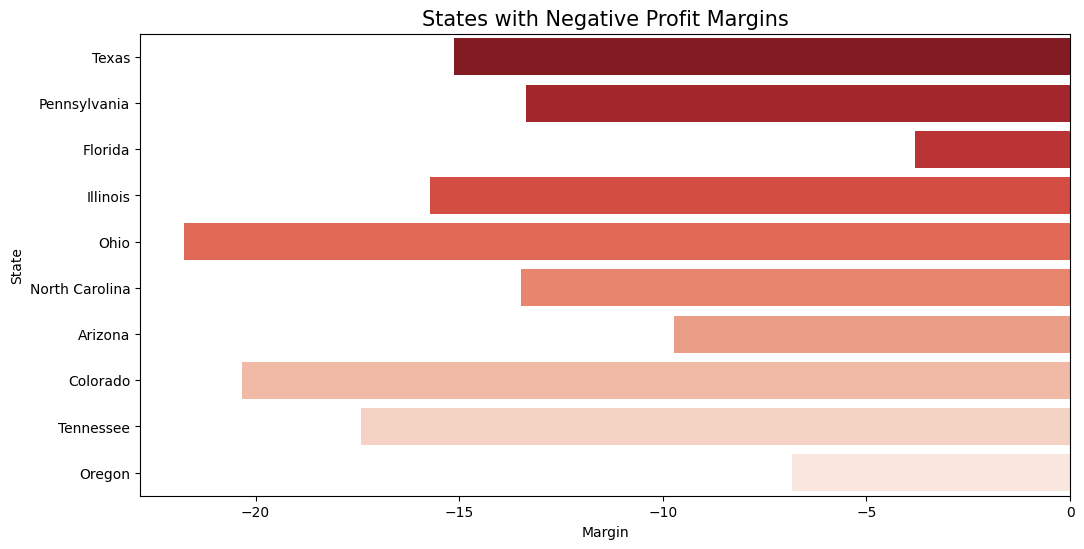

In [17]:
# Identify Loss-Making States (Questions 6, 7 & 10)
state_perf = df.groupby('State').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
state_perf['Margin'] = (state_perf['Profit'] / state_perf['Sales']) * 100

# High Sales but Negative Profit
problem_areas = state_perf[state_perf['Profit'] < 0].sort_values(by='Sales', ascending=False)
print("Top Problem States (High Sales, Negative Profit):\n", problem_areas.head())

# Visualizing Problem Areas
plt.figure(figsize=(12, 6))
sns.barplot(data=problem_areas, x='Margin', y='State', palette='Reds_r')
plt.title('States with Negative Profit Margins', fontsize=15)
plt.show()

In [18]:
# Final dataset for Dashboarding
df.to_csv('Final_Analysis.csv', index=False)
print(" SUCCESS: 'Final_Analysis.csv' is ready for your dashboard.")

 SUCCESS: 'Final_Analysis.csv' is ready for your dashboard.
